In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import array
%matplotlib inline

In [3]:
x = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
msk = np.random.randn(len(x)) < 0.8
train = x[msk]
test = x[~msk]

In [4]:
x.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
x

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


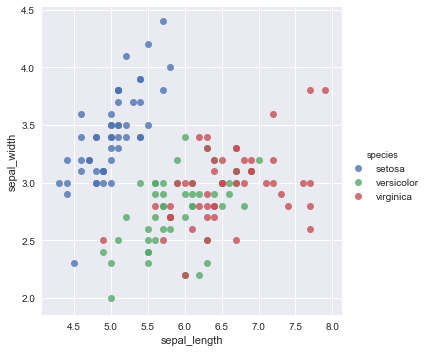

In [6]:
sns.lmplot(x="sepal_length", y="sepal_width", hue="species", data = x, fit_reg=False)

In [7]:
x.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


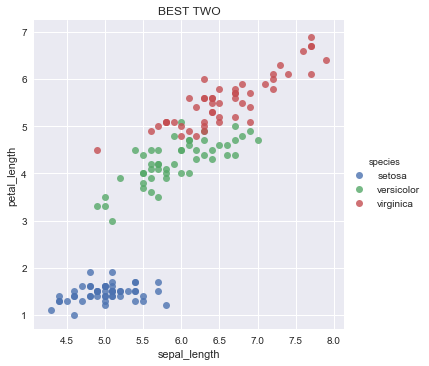

In [8]:
sns.lmplot(x="sepal_length", y="petal_length", hue="species", data = x, fit_reg=False)
plt.title("BEST TWO")

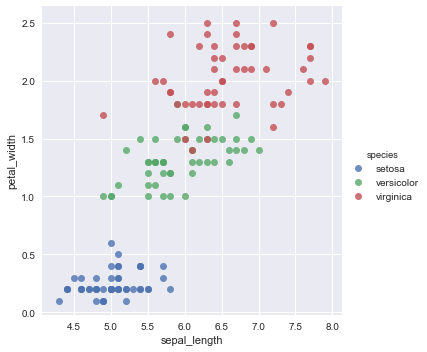

In [9]:
sns.lmplot(x="sepal_length", y="petal_width", hue="species", data = x, fit_reg=False)

In [10]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,118.000000,118.000000,118.000000,118.000000
mean,5.905932,3.063559,3.864407,1.238136
std,0.835361,0.439437,1.758181,0.755484
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.400000
50%,5.850000,3.000000,4.450000,1.350000
75%,6.475000,3.300000,5.200000,1.800000
max,7.900000,4.400000,6.700000,2.500000


In [11]:
test.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,32.000000,32.000000,32.000000,32.000000
mean,5.612500,3.018750,3.368750,1.053125
std,0.769478,0.416156,1.759846,0.785754
min,4.400000,2.200000,1.200000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.550000,3.000000,3.900000,1.150000
75%,6.025000,3.200000,4.825000,1.550000
max,7.700000,4.000000,6.900000,2.400000


In [12]:
model = KNeighborsClassifier()

In [13]:
y = train.pop("species")

In [14]:
y.describe()

count            118
unique             3
top       versicolor
freq              41
Name: species, dtype: object

In [15]:
y

0         setosa
1         setosa
2         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
11        setosa
12        setosa
13        setosa
15        setosa
16        setosa
18        setosa
19        setosa
20        setosa
22        setosa
23        setosa
26        setosa
27        setosa
29        setosa
30        setosa
31        setosa
32        setosa
33        setosa
36        setosa
38        setosa
39        setosa
41        setosa
         ...    
111    virginica
112    virginica
113    virginica
115    virginica
116    virginica
117    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
134    virginica
135    virginica
136    virginica
137    virginica
139    virginica
140    virginica
141    virginica
142    virginica
144    virginica
145    virginica
146    virginica
147    virgini

In [16]:
model.fit(train, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
y1 = test.pop("species")

In [18]:
yres = model.predict(test)

In [19]:
yres

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica'], dtype=object)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y, model.predict(train))

0.98305084745762716